<a href="https://colab.research.google.com/github/basty215/Data_analysis_project/blob/main/data_Anlysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset -f
from __future__ import print_function

import math
import numpy as np
import numpy.linalg as nla
import pandas as pd
import re
import six
from os.path import join
from matplotlib import pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 15

Choc_data = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/flavors_of_cacao.csv", sep=",", encoding='latin-1')

In [ ]:
Choc_data.columns = ['maker', 'specific_origin', 'reference_number', 'review_date', 'coca_percent', 'maker_location', 'rating', 'bean_type', 'broad_origin']

** estudiar** for loops in sub listas.

In [ ]:
Choc_data.dtypes

maker                object
specific_origin      object
reference_number      int64
review_date           int64
coca_percent         object
maker_location       object
rating              float64
bean_type            object
broad_origin         object
dtype: object

In [ ]:
Choc_data['bean_type'] = Choc_data['bean_type'].fillna('blend')

In [ ]:
Choc_data['bean_type'] = Choc_data['bean_type'].astype(str)
Choc_data['coca_percent'] = Choc_data['coca_percent'].str.strip('%')
Choc_data['coca_percent'] = pd.to_numeric(Choc_data['coca_percent'])

In [ ]:
Choc_data.dtypes

maker                object
specific_origin      object
reference_number      int64
review_date           int64
coca_percent        float64
maker_location       object
rating              float64
bean_type            object
broad_origin         object
dtype: object

In [ ]:
print(Choc_data.dtypes)

maker                object
specific_origin      object
reference_number      int64
review_date           int64
coca_percent        float64
maker_location       object
rating              float64
bean_type            object
broad_origin         object
dtype: object


In [ ]:
from google.colab import files

In [ ]:
#$Choc_data.to_csv('Choc_data_modified.csv',index =False)
#files.download('Choc_data_modified.csv')

In [ ]:
Choc_data['maker_location'] = Choc_data['maker_location']\
.str.replace('Amsterdam', 'Holland')\
.str.replace('U.K.', 'England')\
.str.replace('Niacragua', 'Nicaragua')\
.str.replace('Domincan Republic', 'Dominican Republic')

<ipython-input-47-9b9e294c431b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace('U.K.', 'England')\


In [ ]:
Choc_data['maker_location'] = Choc_data['maker_location']\
.str.replace('Holland', 'Netherlands')

In [ ]:
def cleanup_spelling_abbrev(text):
    replacements = [
        ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$', 'Madagascar, '],
        ['PNG', 'Papua New Guinea, '],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador, '],
        ['Nic,|Nic$', 'Nicaragua, '],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], [',  ', ', '], [', ,', ', '], ['\xa0', ' '],[',\s+', ','],
        [' Bali', ',Bali']
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

In [ ]:
Choc_data['specific_origin'] = Choc_data['specific_origin'].str.replace('.', '').apply(cleanup_spelling_abbrev)

<ipython-input-50-cf9f0bf8ef8b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Choc_data['specific_origin'] = Choc_data['specific_origin'].str.replace('.', '').apply(cleanup_spelling_abbrev)


In [ ]:
Choc_data['specific_origin'] = Choc_data['specific_origin'].astype(str)
Choc_data['broad_origin'] = Choc_data['broad_origin'].fillna(Choc_data['specific_origin'])
Choc_data['broad_origin'] = Choc_data['broad_origin'].str.replace('.', '').apply(cleanup_spelling_abbrev)

<ipython-input-53-29c37ac2569e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Choc_data['broad_origin'] = Choc_data['broad_origin'].str.replace('.', '').apply(cleanup_spelling_abbrev)


In [ ]:
Choc_data['bean_type'].unique()

array(['blend', 'Criollo', 'Trinitario', 'Forastero (Arriba)',
       'Forastero', 'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [ ]:
Choc_data.loc[Choc_data['bean_type'].isin(['Trinitario, Criollo']), 'bean_type'] = "Criollo, Trinitario"

In [ ]:
Choc_data[Choc_data['bean_type'].isin(['Trinitario, Criollo'])]

,maker,specific_origin,reference_number,review_date,coca_percent,maker_location,rating,bean_type,broad_origin


In [ ]:
Choc_data.loc[Choc_data['maker']=='Shattel','maker'] = 'Shattell'
Choc_data['maker'] = Choc_data['maker'].str.replace(u'Na\xef\xbf\xbdve','Naive')
Choc_data.head()

,maker,specific_origin,reference_number,review_date,coca_percent,maker_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63.00,France,3.75,blend,Sao Tome
1,A. Morin,Kpime,1676,2015,70.00,France,2.75,blend,Togo
2,A. Morin,Atsane,1676,2015,70.00,France,3.00,blend,Togo
3,A. Morin,Akata,1680,2015,70.00,France,3.50,blend,Togo
4,A. Morin,Quilla,1704,2015,70.00,France,3.50,blend,Peru


In [ ]:
# prompt: Review_date maker location

Choc_data['review_date'] = pd.to_datetime(Choc_data['review_date'], errors='coerce', format='%Y-%m-%d')
Choc_data['review_date'].describe()
Choc_data['review_date'].fillna(Choc_data['review_date'].mean(), inplace=True)
Choc_data['review_date'].describe()
Choc_data.loc[Choc_data['review_date'] < '2000-01-01', 'review_date'] = Choc_data['review_date'].mean()
Choc_data['review_date'].describe()
Choc_data['review_date'] = Choc_data['review_date'].dt.year
Choc_data['review_date'].unique()
Choc_data['review_date'].value_counts()
Choc_data['review_date'].value_counts().sort_index()
Choc_data['review_date'].value_counts().sort_index().plot.bar()
plt.xticks(rotation=45)
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()
Choc_data['review_date'].value_counts().sort_index().plot.barh()
plt.title('Number of Reviews per Year')
plt.xlabel('Number of Reviews')
plt.ylabel('Year')
plt.show()
Choc_data['rating'].describe()
Choc_data['rating'].value_counts().sort_index()
Choc_data['rating'].value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)
plt.title('Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()
Choc_data['coca_percent'].describe()
Choc_data['coca_percent'].value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)
plt.title('Number of Reviews per Cacao Percentage')
plt.xlabel('Cacao Percentage')
plt.ylabel('Number of Reviews')
plt.show()
Choc_data['maker_location'].value_counts().sort_index()
Choc_data['maker_location'].value_counts().sort_index().plot.barh()
plt.title('Number of Reviews per Maker Location')
plt.xlabel('Number of Reviews')
plt.ylabel('Maker Location')
plt.show()
Choc_data['broad_origin'].value_counts().sort_index().plot.barh()
plt.title('Number of Reviews per Broad Origin')
plt.xlabel('Number of Reviews')
plt.ylabel('Broad Origin')
plt.show()
Choc_data['bean_type'].value_counts().sort_index().plot.barh()
plt.title('Number of Reviews per Bean Type')
plt.xlabel('Number of Reviews')
plt.ylabel('Bean Type')
plt.show()
Choc_data.groupby('bean_type')['rating'].mean().sort_values(ascending=False)
Choc_data.groupby('broad_origin')['rating'].mean().sort_values(ascending=False)
Choc_data.groupby('maker_location')['rating'].mean().sort_values(ascending=False)
Choc_data.groupby('review_date')['rating'].mean().sort_values(ascending=False)
Choc_data.groupby('coca_percent')['rating'].mean().sort_values(ascending=False)
Choc_data.groupby('coca_percent')['rating'].mean().plot()
plt.title('Average Rating by Cacao Percentage')
plt.xlabel('Cacao Percentage')
plt.ylabel('Average Rating')
plt.show()
Choc_data.groupby('maker')['rating'].mean().sort_values(ascending=False).head(10)
Choc_data.groupby('maker')['rating'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=45)
plt.title('Top 10 Makers by Average Rating')
plt.xlabel('Maker')
plt.ylabel('Average Rating')
plt.show()
Choc_data.groupby('broad_origin')['rating'].mean().sort_values(ascending=False).head(10)
Choc_data.groupby('broad_origin')['rating'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=45)
plt.title('Top 10 Broad Origins by Average Rating')
plt.xlabel('Broad Origin')
plt.ylabel('Average Rating')
plt.show()
Choc_data.groupby('maker_location')['rating'].mean().sort_values(ascending=False).head(10)
Choc_data.groupby('maker_location')['rating'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=45)
plt.title('Top 10 Maker Locations by Average Rating')
plt.xlabel('Maker Location')
plt.ylabel('Average Rating')
plt.show()
Choc_data.groupby('review_date')['rating'].mean().plot()
plt.title('Average Rating by Review Year')
plt.xlabel('Review Year')
plt.ylabel('Average Rating')
plt.show()
Choc_data.groupby('coca_percent')['rating'].mean().plot()
plt.title('Average Rating by Cacao Percentage')
plt.xlabel('Cacao Percentage')
plt.ylabel('Average Rating')
plt.show()
Choc_data.groupby('maker')['rating'].mean().plot()
plt.title('Average Rating by Maker')
plt.xlabel('Maker')
plt.ylabel('Average Rating')
plt.show()
Choc_data.groupby('broad_origin')['rating'].mean().plot()
plt.title('Average Rating by Broad Origin')
plt.xlabel('Broad Origin')
plt.ylabel('Average Rating')
plt.show()
Choc_data.groupby('maker_location')['rating'].mean().plot()
plt.title('Average Rating by Maker Location')
plt.xlabel('Maker Location')
plt.ylabel('Average Rating')
plt.show()
Choc_data.groupby('bean_type')['rating'].mean().plot()
plt.title('Average Rating by Bean Type')
plt.xlabel('Bean Type')
plt.ylabel('Average Rating')
plt.show()
Choc_data.groupby('maker')['rating'].count().sort_values(ascending=False).head(10)
Choc_data.groupby('maker')['rating'].count().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=45)
plt.title('Top 10 Makers by Number of Reviews')
plt.xlabel('Maker')
plt.ylabel('Number of Reviews')
plt.show()
Choc_data.groupby('broad_origin')['rating'].count().sort_values(ascending=False).head(10)
Choc_data.groupby('broad_origin')['rating'].count().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=45)
plt.title('Top 10 Broad Origins by Number of Reviews')
plt.xlabel('Broad Origin')
plt.ylabel('Number of Reviews')
plt.show()
Choc_data.groupby('maker_location')['rating'].count().sort_values(ascending=False).head(10)
Choc_data.groupby('maker_location')['rating'].count().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=45)
plt.title('Top 10 Maker Locations by Number of Reviews')
plt.xlabel('Maker Location')
plt.ylabel('Number of Reviews')
plt.show()
Choc_data.groupby('review_date')['rating'].count().plot()
plt.title('Number of Reviews by Review Year')
plt.xlabel('Review Year')
plt.ylabel('Number of Reviews')
plt.show()
Choc_data.groupby('coca_percent')['rating'].count().plot()
plt.title('Number of Reviews by Cacao Percentage')
plt.xlabel('Cacao Percentage')
plt.ylabel('Number of Reviews')
plt.show()
Choc_data.groupby('maker')['rating'].count().plot()
plt.title('Number of Reviews by Maker')
plt.xlabel('Maker')
plt.ylabel('Number of Reviews')
plt.show()
Choc_data.groupby('broad_origin')['rating'].count().plot()
plt.title('Number of Reviews by Broad Origin')
plt.xlabel('Broad Origin')
plt.ylabel('Number of Reviews')
plt.show()
Choc_data.groupby('maker_location')['rating'].count().plot()
plt.title('Number of Reviews by Maker Location')
plt.xlabel('Maker Location')
plt.ylabel('Number of

TypeError: 'method' object is not subscriptable

In [ ]:
Choc_data['review_date'].describe()


count   1795.00
mean    2012.33
std        2.93
min     2006.00
25%     2010.00
50%     2013.00
75%     2015.00
max     2017.00
Name: review_date, dtype: float64

In [ ]:
Choc_data['review_date'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2009, 2010, 2017, 2008, 2007,
       2006])

In [ ]:
Choc_data.index

RangeIndex(start=0, stop=1795, step=1)

In [ ]:
Choc_data.sort_index(axis=)

cual fue el mejor broad origin con el mejor rating en el 2011??

In [ ]:
Choc_data[Choc_data['review_date']>=2011]

,maker,specific_origin,reference_number,review_date,coca_percent,maker_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63.00,France,3.75,blend,Sao Tome
1,A. Morin,Kpime,1676,2015,70.00,France,2.75,blend,Togo
2,A. Morin,Atsane,1676,2015,70.00,France,3.00,blend,Togo
3,A. Morin,Akata,1680,2015,70.00,France,3.50,blend,Togo
4,A. Morin,Quilla,1704,2015,70.00,France,3.50,blend,Peru
...,...,...,...,...,...,...,...,...,...
1789,Zotter,"Indianer,Raw",883,2012,58.00,Austria,3.50,blend,"Indianer,Raw"
1790,Zotter,Peru,647,2011,70.00,Austria,3.75,blend,Peru
1791,Zotter,Congo,749,2011,65.00,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.00,Austria,3.50,Forastero,India


In [ ]:
Choc_data.loc[2011:2011,['review_date']]

,review_date


In [ ]:
Choc_data['broad_origin'].unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', 'Nine', 'Jamaica',
       'Grenada', 'Toscano Black', 'Guatemala', 'Honduras', 'Costa Rica',
       'Haiti', 'Congo', 'Philippines', 'Houseblend', 'Malaysia',
       'Nature', 'Dominican Republic,Bali', 'Organic Dark',
       'Venezuela,Africa,Brasil,Peru,Mexico', 'Gabon', 'Ivory Coast',
       'Carribean', 'One Hundred', 'Sri Lanka', 'Blend', 'Puerto Rico',
       'Lago di Como,Blu', 'Uganda', 'Blend No 1',
       'Philly Blend,5 plantations', 'Kendari', 'Tarakan', 'Maragda',
       'Martinique', 'Sao Tome,Principe', 'Sensations Intense', 'Vanuatu',
       'Australia', 'Zorzal Reserva,2015 H,Kerchner', 'Liberia',
       'Ecuador,Costa Rica', 'West Africa', 'Hawaii', 'Noir', 'Ilblend',
    

In [ ]:
options = ['broad_origin', 'review_date', 'rating']
rslt_df = Choc_data[(Choc_data['broad_origin'] == 'brazil') & Choc_data['review_date'].isin(options)]
print("\nResult dataframe:\n", rslt_df)



Result dataframe:
 Empty DataFrame
Columns: [maker, specific_origin, reference_number, review_date, coca_percent, maker_location, rating, bean_type, broad_origin]
Index: []


In [ ]:
Choc_data_2011 = Choc_data[Choc_data['review_date'] == 2011]
mean_rating_by_origin = Choc_data_2011.groupby('broad_origin')['rating'].mean()
best_origin = mean_rating_by_origin.idxmax()
print(f"the best broad origin with the highest rating in 2011 is: {best_origin}")

the best broad origin with the highest rating in 2011 is: Haiti


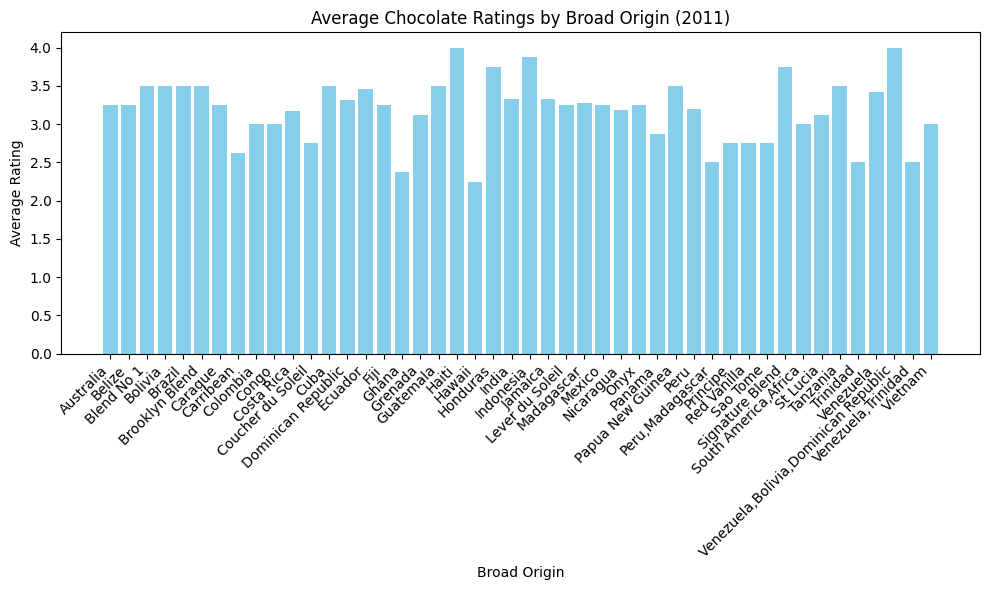

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mean_rating_by_origin.index, mean_rating_by_origin.values, color='skyblue')
plt.xlabel('Broad Origin')
plt.ylabel('Average Rating')
plt.title('Average Chocolate Ratings by Broad Origin (2011)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
r = mean_rating_by_origin.to_csv('r.csv')
files.download('r.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>